In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [256]:
df=pd.read_csv(r"C:\Users\DATA\hearing_test.csv")

In [257]:
# Display the first few rows of the dataset
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [258]:
# Display statistical summary of numerical columns
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [259]:
# Display the count of each unique value
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

Text(0, 0.5, 'Count')

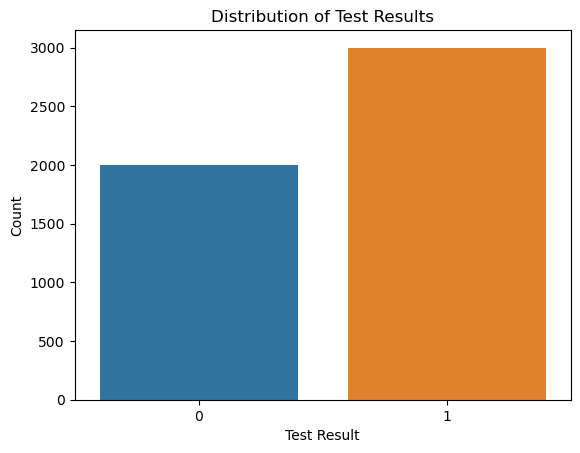

In [260]:
# count of occurrences for each unique value in the 'test_result' column. 
sns.countplot(x='test_result', data=df)

plt.title('Distribution of Test Results')
plt.xlabel('Test Result')
plt.ylabel('Count')

<Axes: xlabel='test_result', ylabel='age'>

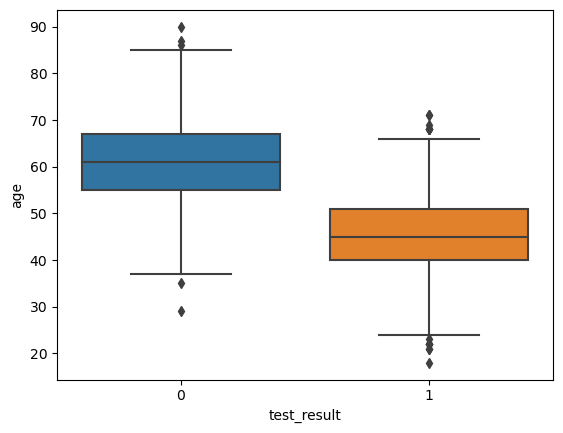

In [261]:
# to visualize the distribution of ages across different test results
sns.boxplot(x='test_result',y='age',data=df)

<Axes: xlabel='test_result', ylabel='physical_score'>

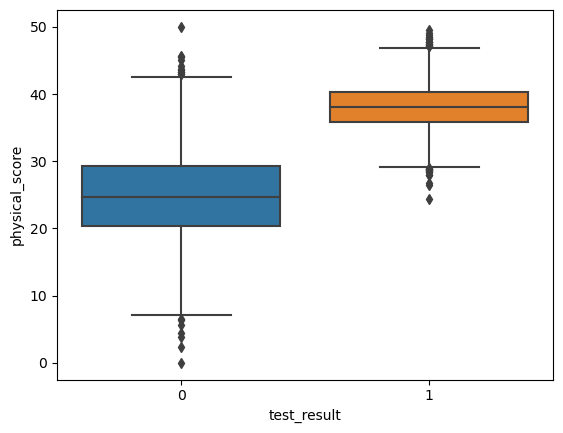

In [262]:
# to visualize the distribution of physical_score across different test results
sns.boxplot(x='test_result',y='physical_score',data=df)

<Axes: xlabel='age', ylabel='physical_score'>

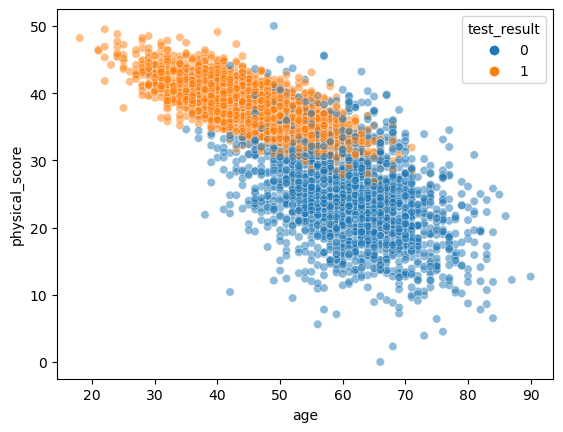

In [263]:
#to visualize  the relationship between the 'age' and 'physical_score' variables.
plt.figure(dpi=100)
sns.scatterplot(x='age',y='physical_score',hue='test_result',data=df,alpha=0.5)

C:\Users\priya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


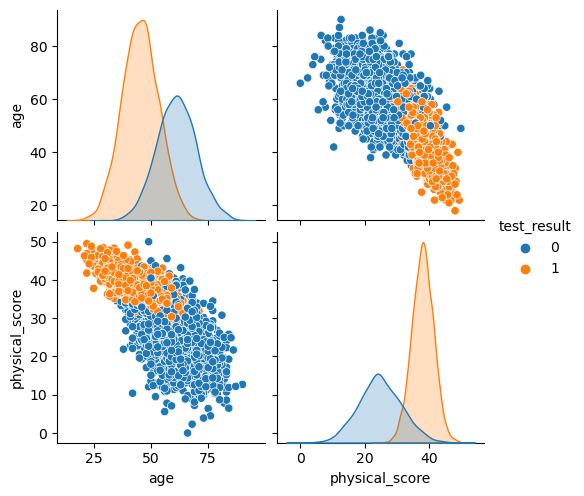

In [264]:
sns.pairplot(df,hue='test_result')

<Axes: >

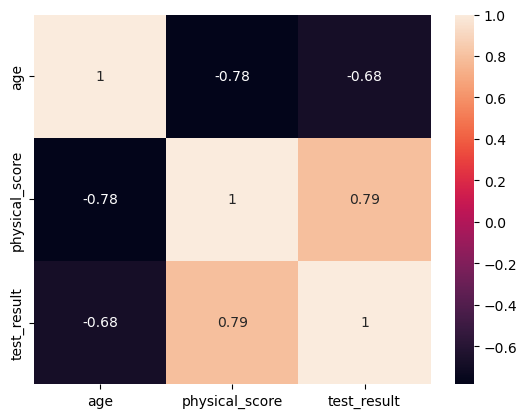

In [265]:
# to visualize correlation  between different numerical features in the dataset.
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='physical_score', ylabel='test_result'>

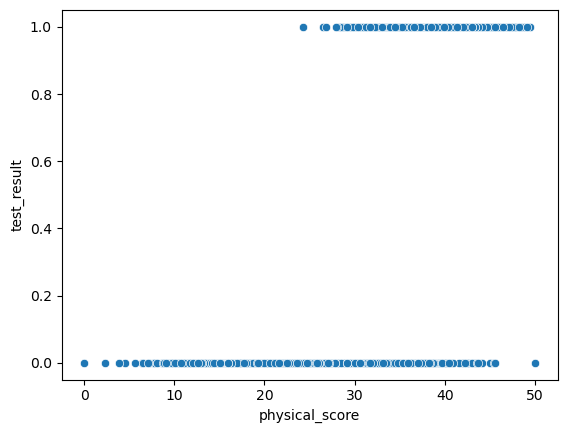

In [266]:
sns.scatterplot(x='physical_score',y='test_result',data=df)

In [267]:
#to separate the features from the target variable.
X=df.drop('test_result',axis=1)
y=df['test_result']

In [268]:
# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [269]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
scaled_X_train= scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

In [270]:
# Train the logistic regression model
log_model=LogisticRegression()

In [271]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [272]:
log_model.coef_

array([[-0.96752412,  3.51478169]])

In [273]:
# Make predictions on the test set
y_pred= log_model.predict_proba(scaled_X_test)

In [274]:
y_pred

array([[0.03794292, 0.96205708],
       [0.97865993, 0.02134007],
       [0.03125824, 0.96874176],
       ...,
       [0.27550018, 0.72449982],
       [0.00456875, 0.99543125],
       [0.04910789, 0.95089211]])

In [279]:
y_pred = log_model.predict(scaled_X_test)
# is done to obtain the predicted labels for the test set based on the trained logistic regression model.

In [280]:
# Evaluate the model

In [281]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[573  90]
 [ 61 926]]


In [285]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[573  90]
 [ 61 926]]


In [283]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       663
           1       0.91      0.94      0.92       987

    accuracy                           0.91      1650
   macro avg       0.91      0.90      0.90      1650
weighted avg       0.91      0.91      0.91      1650



In [299]:
X_train.iloc[0]

age               56.0
physical_score    14.4
Name: 1522, dtype: float64

In [300]:
y_train.iloc[0]

0

In [302]:
log_model.predict_proba(X_train.iloc[0].values.reshape(1, -1))


array([[0.95431079, 0.04568921]])

suggests that the model assigns a high probability (approximately 95.43%) to class 0 (fail) and a low probability (approximately 4.57%) to class 1 (pass).

In [303]:
log_model.predict(X_train.iloc[0].values.reshape(1, -1))

array([0], dtype=int64)

 indicates that the model predicts class 0 (fail) for this example. 